In [1]:
import numpy as np
import pandas as pd
import collections
from sklearn import datasets,tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
iris = datasets.load_iris()

In [3]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [4]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
iris.data.shape

(150, 4)

In [6]:
iris.target.shape

(150,)

In [7]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(iris.data,iris.target,
                                                 stratify= iris.target,
                                                 test_size=0.3,random_state=123
                                                )

In [8]:
collections.Counter(y_train)

Counter({1: 35, 0: 35, 2: 35})

In [9]:
#create a gaussian classifer
#n_estimators:The number of trees in the forest
model = RandomForestClassifier(n_estimators=100,criterion='gini',)

#train the model
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [10]:
#evaluate model accuracy
acc = metrics.accuracy_score(y_test,y_pred)
print('{:.4f}'.format(acc))

0.9778


In [11]:
# f1 score
# F1 = 2 * (precision * recall) / (precision + recall)
# precision = the number of true positives over the number of true positives plus the number of false positives 
# recall = the number of true positives over the number of true positives plus the number of false negatives
f1_score = metrics.f1_score(y_test,y_pred,average=None)
print(f1_score)

[1.         0.96551724 0.96774194]


In [12]:
#confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[15  0  0]
 [ 0 14  1]
 [ 0  0 15]]


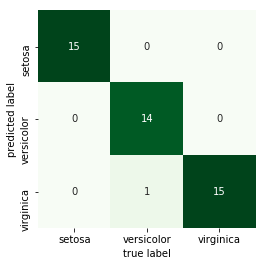

In [13]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap="Greens",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [14]:
feature_imp = model.feature_importances_
feature_imp

array([0.12397491, 0.03592751, 0.43661136, 0.40348622])

In [15]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [16]:
feature_imp_df = pd.DataFrame()
feature_imp_df['feature_imp'] = feature_imp
feature_imp_df['feature_names'] = iris.feature_names
feature_imp_df.sort_values('feature_imp',ascending=False,inplace=True)

In [17]:
# Creating a bar plot
sns.barplot(x=feature_imp_df.feature_imp.values, y=feature_imp_df.feature_names.values)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
#plt.legend()
plt.show()

### Remove the least important feature and rerun the model

In [18]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [19]:
iris.data.shape

(150, 4)

In [20]:
iris.data[0,:]

array([5.1, 3.5, 1.4, 0.2])

In [21]:
iris.data[0,[0,2,3]]

array([5.1, 1.4, 0.2])

In [22]:
# split the data
X_train,X_test,y_train,y_test = train_test_split(iris.data[:,[0,2,3]],
                                                 iris.target,
                                                 stratify= iris.target,
                                                 test_size=0.3,random_state=123
                                                )

In [23]:
collections.Counter(y_train)

Counter({1: 35, 0: 35, 2: 35})

In [24]:
#create a gaussian classifer
#n_estimators:The number of trees in the forest
model = RandomForestClassifier(n_estimators=100,criterion='gini',)

#train the model
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

In [25]:
#evaluate model accuracy
acc = metrics.accuracy_score(y_test,y_pred)
print('{:.4f}'.format(acc))

0.9333


In [26]:
# f1 score
# F1 = 2 * (precision * recall) / (precision + recall)
# precision = the number of true positives over the number of true positives plus the number of false positives 
# recall = the number of true positives over the number of true positives plus the number of false negatives
f1_score = metrics.f1_score(y_test,y_pred,average=None)
print(f1_score)

[1.         0.89655172 0.90322581]


In [27]:
#confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
print(cm)

[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]


In [28]:
sns.heatmap(cm.T, square=True, annot=True, fmt='d', cbar=False,cmap="Greens",
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [29]:
model.feature_importances_

array([0.21970729, 0.41428367, 0.36600904])

In [30]:
selected_feature = [0,2,3]
from operator import itemgetter 
itemgetter(*selected_feature)(iris.feature_names)

('sepal length (cm)', 'petal length (cm)', 'petal width (cm)')

In [31]:
feature_names = np.array(iris.feature_names)
feature_names[selected_feature]

array(['sepal length (cm)', 'petal length (cm)', 'petal width (cm)'],
      dtype='<U17')